# A7 Task1:PCA&Kernel PCA
- PCA 使用使用线性函数将原始特征投影到低维特征空间，生成子空间的维度按照原始特征沿着该维度的方差排序而成、
- 使用了核方法的PCA使用更加复杂的非线性变换来进行投影
- 本实验将以MNIST数据集为例，展示PCA和Kernel PCA方法是如何将复杂图像的特征从高维度(784维)特征空间投影到二维空间R2，并进行可视化

authored by hammershock (张瀚墨2021213368)

### 零、首先安装依赖

In [20]:
!pip install torch torchvision
!pip install numpy
!pip install scikit-learn
!pip install matplotlib

### 一、导入模块

In [21]:
%time
import torchvision
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs


### 二、读取图像和标签

In [22]:
%time
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
images = train_dataset.data.numpy()
labels = train_dataset.targets.numpy()
flattened_images = images.reshape(images.shape[0], -1)

print(flattened_images.shape, labels.shape)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.58 µs
(60000, 784) (60000,)


### 三、PCA降维

In [23]:
%time
# Perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
reduced_images = pca.fit_transform(flattened_images)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


### 四、Kernel PCA 降维（这可能花费较多时间运行）

In [24]:
%time
# Perform Kernel PCA to reduce the dimensionality to 2
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
reduced_images_kernel = kernel_pca.fit_transform(flattened_images)

print(reduced_images.shape)
print(reduced_images_kernel.shape)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs
(60000, 2)
(60000, 2)


### 五、PCA可视化

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


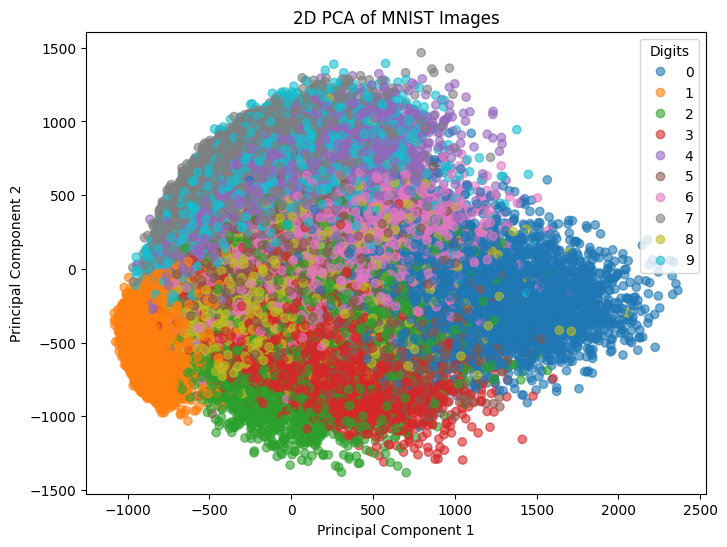

In [25]:
%time
# Visualizing the reduced images
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_images[:, 0], reduced_images[:, 1], c=labels, cmap='tab10', alpha=0.6)
plt.title('2D PCA of MNIST Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], title="Digits", labels=range(10))
plt.show()

### 六、Kernel PCA 可视化

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs


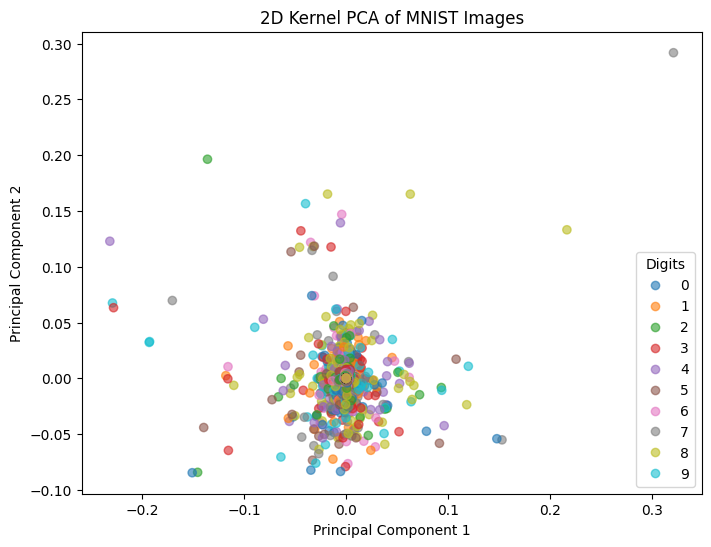

In [26]:
%time
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_images_kernel[:, 0], reduced_images_kernel[:, 1], c=labels, cmap='tab10', alpha=0.6)
plt.title('2D Kernel PCA of MNIST Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], title="Digits", labels=range(10))
plt.show()

### 七、测试评估(需要非常长时间)

In [27]:
# Training SVM on PCA reduced data
svm_pca = SVC()
svm_pca.fit(reduced_images, labels)
y_pred_pca = svm_pca.predict(reduced_images)
accuracy_pca = accuracy_score(labels, y_pred_pca)

# Training SVM on Kernel PCA reduced data
svm_kpca = SVC()
svm_kpca.fit(reduced_images_kernel, labels)
y_pred_kpca = svm_kpca.predict(reduced_images_kernel)
accuracy_kpca = accuracy_score(labels, y_pred_kpca)

print("accuracy PCA", accuracy_pca)
print("accuracy Kernel PCA", accuracy_kpca)

accuracy PCA 0.4696
accuracy Kernel PCA 0.11716666666666667


可见仅仅使用降维后的两维作为特征进行分类，是远远不够的

查看PCA降维后两个维度的方差贡献率，他们加在一起不到20%

In [28]:
pca.explained_variance_ratio_

array([0.09704664, 0.07095924])